<a href="https://colab.research.google.com/github/maleehahassan/HIDA_Into_to_DL/blob/main/03_advanced_layer_types.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Overview: Image Classification with Deep Learning

In this project, you will explore the fundamentals of image classification using deep learning techniques. The motivation behind this code is to introduce learners to the process of building, training, and evaluating neural networks for computer vision tasks. You will work with the CIFAR10 dataset, a widely used benchmark in machine learning, which contains 60,000 color images in 10 different classes.

Throughout the notebook, you will:
- Load and preprocess image data for neural network training
- Visualize sample images and understand their structure
- Build and compare different convolutional neural network (CNN) architectures
- Train models and monitor their performance using accuracy and loss metrics
- Explore techniques such as pooling and dropout to improve model generalization

By the end of this project, you will gain hands-on experience with key concepts in deep learning for image classification, and understand how to apply these methods to real-world datasets.

# image classification

We will use the CIFAR10 dataset: https://www.cs.toronto.edu/~kriz/cifar.html

In [4]:
# Import keras from tensorflow for building neural networks
from tensorflow import keras

In [5]:
# Check the installed version of keras
keras.__version__

'3.10.0'

In [6]:
# Load the CIFAR10 dataset and split into training and test sets
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [7]:
# Show the shape of the training images array
train_images.shape

(50000, 32, 32, 3)

In [8]:
# Show the data type of the training images
train_images.dtype

dtype('uint8')

In [9]:
# Set the number of images to use for training
n_images = 5000

# Select the first n_images for training
train_images = train_images[:n_images]
train_labels = train_labels[:n_images]

In [10]:
# Show the new shape of the training images after selection
train_images.shape

(5000, 32, 32, 3)

In [11]:
# Show the minimum and maximum pixel values in the training images
train_images.min(), train_images.max()

(np.uint8(0), np.uint8(255))

In [12]:
# Show the shape of the training labels
train_labels.shape

(5000, 1)

In [13]:
# Show the minimum and maximum label values
train_labels.min(), train_labels.max()

(np.uint8(0), np.uint8(9))

In [14]:
# Show the data type of the training labels
train_labels.dtype

dtype('uint8')

In [15]:
# Normalize the pixel values to the range [0, 1]
train_images = train_images / 255.
test_images = test_images / 255.

In [16]:
# Define the class names for the CIFAR10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


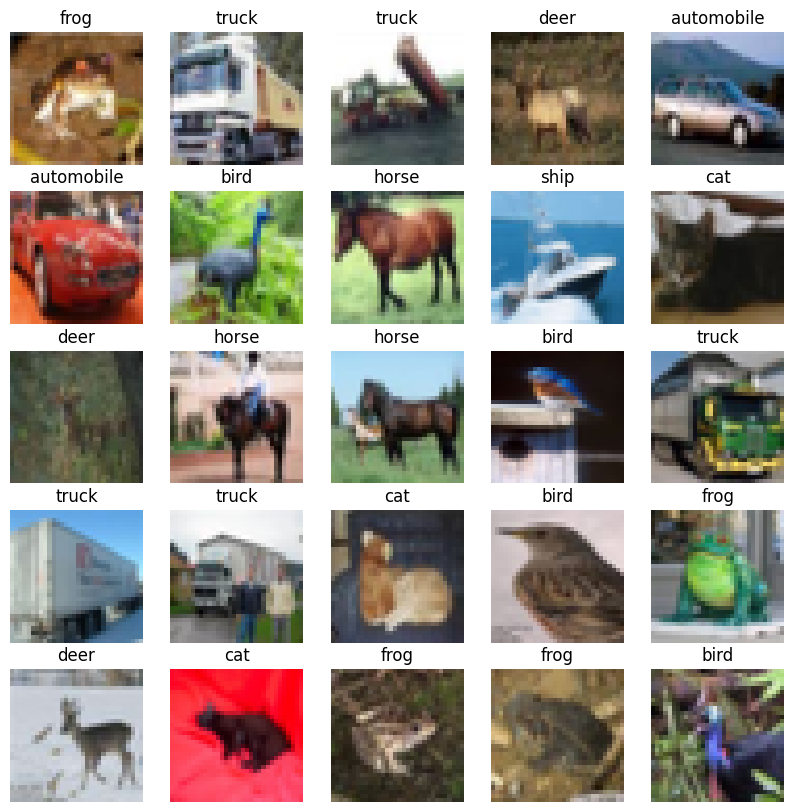

In [17]:
# Import matplotlib for image visualization
import matplotlib.pyplot as plt

# Create a figure to display 25 sample images
plt.figure(figsize=(10,10))

# Loop through the first 25 images and display them with their class names
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.axis('off')
  plt.title(class_names[train_labels[i,0]])
plt.show()

In [18]:
# Calculate the total number of pixels per image
image_dim = train_images.shape[1]*train_images.shape[2]*train_images.shape[3]
print(image_dim)

3072


![](https://carpentries-incubator.github.io/deep-learning-intro/fig/04_conv_matrix.png)

![](https://carpentries-incubator.github.io/deep-learning-intro/fig/04_conv_image.png)

In [19]:
# Define a function to create the first CNN model
def create_cnn1():

  # Input layer, specifying the shape of the input images
  inputs = keras.Input(shape=train_images.shape[1:])

  # First convolutional layer with 32 filters, 3x3 kernel, and ReLU activation
  conv1 = keras.layers.Conv2D(32, (3,3), activation='relu')(inputs)

  # Second convolutional layer with 32 filters, 3x3 kernel, and ReLU activation
  conv2 = keras.layers.Conv2D(32, (3,3), activation='relu')(conv1)

  # Flatten the output from the convolutional layers to feed into the dense layer
  flat = keras.layers.Flatten()(conv2)

  # Output layer with 10 units (one for each class)
  outputs = keras.layers.Dense(10)(flat)

  # Return the constructed model
  return keras.Model(inputs=inputs, outputs=outputs, name="cifar_model_small")

# Create an instance of the model
model = create_cnn1()

# Display the model architecture
model.summary()

Model: "cifar_model_small"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │       250,890 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 261,034 (1019.66 KB)

 Trainable params: 261,034 (1019.66 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Define a function to create the second CNN model with pooling layers
def create_cnn2():

  # Input layer, specifying the shape of the input images
  inputs = keras.Input(shape=train_images.shape[1:])

  # First convolutional layer with 32 filters, 3x3 kernel, and ReLU activation
  conv1 = keras.layers.Conv2D(32, (3,3), activation='relu')(inputs)

  # First pooling layer (2x2 max pooling)
  pool1 = keras.layers.MaxPool2D((2,2))(conv1)

  # Second convolutional layer with 32 filters, 3x3 kernel, and ReLU activation
  conv2 = keras.layers.Conv2D(32, (3,3), activation='relu')(pool1)

  # Second pooling layer (2x2 max pooling)
  pool2 = keras.layers.MaxPool2D((2,2))(conv2)

  # Flatten the output from the convolutional layers to feed into the dense layer
  flat = keras.layers.Flatten()(pool2)

  # Output layer with 10 units (one for each class)
  outputs = keras.layers.Dense(10)(flat)

  # Return the constructed model
  return keras.Model(inputs=inputs, outputs=outputs, name="cifar_model_small")

# Create an instance of the model
model = create_cnn2()

# Display the model architecture
model.summary()

Model: "cifar_model_small"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        11,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,674 (84.66 KB)

 Trainable params: 21,674 (84.66 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Compile the model with Adam optimizer, sparse categorical crossentropy loss, and accuracy metric
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
# Train the model on the training data for 10 epochs, with validation on the test data
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.1801 - loss: 2.1866 - val_accuracy: 0.3206 - val_loss: 1.8821
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3749 - loss: 1.7515 - val_accuracy: 0.4056 - val_loss: 1.6561
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4544 - loss: 1.5623 - val_accuracy: 0.4461 - val_loss: 1.5329
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4754 - loss: 1.4761 - val_accuracy: 0.4383 - val_loss: 1.5562
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5039 - loss: 1.3813 - val_accuracy: 0.4832 - val_loss: 1.4412
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5337 - loss: 1.2912 - val_accuracy: 0.4852 - val_loss: 1.4220
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5531 - loss: 1.2485 - val_accuracy: 0.4991 - val_loss: 1.3945
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5697 - loss: 1.2172 - val_accuracy: 

In [23]:
# Import seaborn and pandas for data visualization and manipulation
import seaborn as sns
import pandas as pd

# Convert the training history to a DataFrame for easier plotting
history_df = pd.DataFrame.from_dict(history.history)
print(history_df.columns)

Index(['accuracy', 'loss', 'val_accuracy', 'val_loss'], dtype='object')


<Axes: >

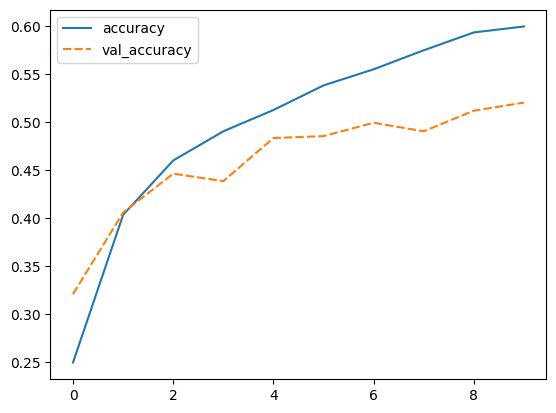

In [24]:
# Plot the training and validation accuracy over epochs
sns.lineplot(data=history_df[['accuracy','val_accuracy']])

<Axes: >

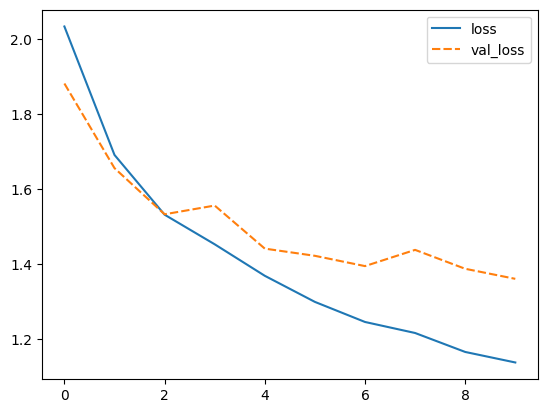

In [25]:
# Plot the training and validation loss over epochs
sns.lineplot(data=history_df[['loss','val_loss']])

![](https://carpentries-incubator.github.io/deep-learning-intro/fig/neural_network_sketch_dropout.png)

In [26]:
# Define a function to create the third CNN model with dropout
def create_cnn3():

  # Input layer, specifying the shape of the input images
  inputs = keras.Input(shape=train_images.shape[1:])

  # First convolutional layer with 32 filters, 3x3 kernel, and ReLU activation
  conv1 = keras.layers.Conv2D(32, (3,3), activation='relu')(inputs)

  # First pooling layer (2x2 max pooling)
  pool1 = keras.layers.MaxPool2D((2,2))(conv1)

  # Second convolutional layer with 32 filters, 3x3 kernel, and ReLU activation
  conv2 = keras.layers.Conv2D(32, (3,3), activation='relu')(pool1)

  # Second pooling layer (2x2 max pooling)
  pool2 = keras.layers.MaxPool2D((2,2))(conv2)

  # Dropout layer with 20% rate to reduce overfitting
  dropped = keras.layers.Dropout(0.2)(pool2)

  # Flatten the output from the convolutional layers to feed into the dense layer
  flat = keras.layers.Flatten()(dropped)

  # Output layer with 10 units (one for each class)
  outputs = keras.layers.Dense(10)(flat)

  # Return the constructed model
  return keras.Model(inputs=inputs, outputs=outputs, name="cifar_model_small_withdropout")

# Create an instance of the model
model = create_cnn3()

# Display the model architecture
model.summary()




Model: "cifar_model_small_withdropout"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        11,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,674 (84.66 KB)

 Trainable params: 21,674 (84.66 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Compile the model with Adam optimizer, sparse categorical crossentropy loss, and accuracy metric
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# Train the model on the training data for 10 epochs, with validation on the test data
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.1799 - loss: 2.1845 - val_accuracy: 0.3302 - val_loss: 1.8355
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3590 - loss: 1.7767 - val_accuracy: 0.3777 - val_loss: 1.6883
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4128 - loss: 1.6389 - val_accuracy: 0.4262 - val_loss: 1.5923
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4644 - loss: 1.5422 - val_accuracy: 0.4277 - val_loss: 1.5855
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4827 - loss: 1.4657 - val_accuracy: 0.4772 - val_loss: 1.4680
Epoch 6/10
134/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5299 - loss: 1.3409

In [ ]:
# Convert the training history to a DataFrame for easier plotting
history_df = pd.DataFrame.from_dict(history.history)
history_df['epoch'] = range(1,len(history_df)+1)
history_df = history_df.set_index('epoch')

# Plot the training and validation accuracy over epochs
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])

In [ ]:
# Evaluate the model on the test data and store the loss and accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
# Plot the training and validation loss over epochs
sns.lineplot(data=history_df[['loss', 'val_loss']])